In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib
matplotlib.rcParams['figure.figsize'] = (12, 8)

import warnings
warnings.filterwarnings('ignore')

# k Nearest Neighbors (kNN)
Метод k ближайших соседей рассчитывает расстояния от нового объекта до всех объектов выборки и, отбирая k ближайших, предсказывает целевую переменную с помощью голосования (в случае классификации) или усреднения (в случае регрессии). \
При этом этот метод можно по-разному настраивать, например можно изменить способ подсчета расстояний или способ взвешивания соседей по расстоянию. \
Для начала скачаем датасет и визуализируем данные.

In [ ]:
circ = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/concertriccir2.csv')
circ.head()

,X,Y,class
0,0.70,-0.247,0.0
1,-3.95,2.740,1.0
2,0.15,-2.160,1.0
3,-1.67,-0.942,1.0
4,2.56,-1.850,1.0


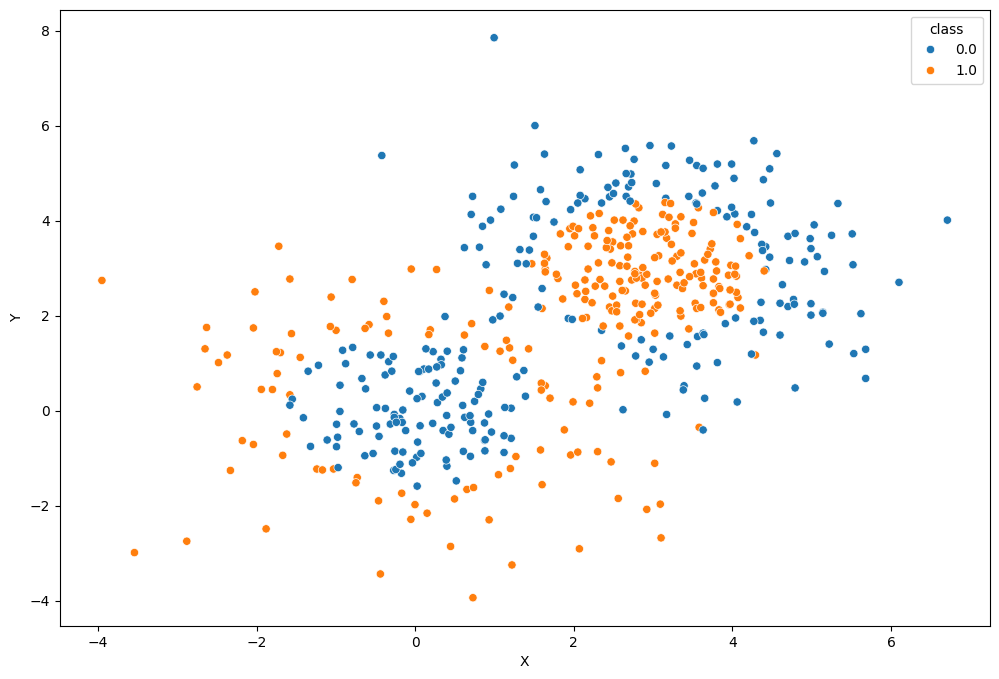

In [ ]:
sns.scatterplot(x=circ['X'], y=circ['Y'], hue=circ['class']);

**Задание 1.** Обучите логистическую регрессию на данных и нарисуйте разделяющую гиперплоскость (прямую) на рисунке с данными. Как линейный классификатор справился с задачей? Сделайте вывод исходя из геометрии данных и линии разделения. Какой accuracy выйдет на всей выборке (без валидации)?

In [ ]:
from sklearn.linear_model import LogisticRegression

### Your code is here
X = circ.drop(columns=['class'])
y = circ['class']

log_reg_modle = LogisticRegression()
log_reg_modle.fit(X, y)



LogisticRegression()

In [ ]:
log_reg_modle.score(X,y)

0.424

In [ ]:
log_reg_modle.coef_

array([[-0.003161 , -0.0120486]])

In [ ]:
log_reg_modle.coef_.T

array([[-0.003161 ],
       [-0.0120486]])

In [ ]:
log_reg_modle.intercept_

array([0.02848741])

In [ ]:
w1, w2 = log_reg_modle.coef_[0]
w0 = log_reg_modle.intercept_[0]

In [ ]:
m = -w0 / w2
c = -w1 / w2

In [ ]:
y_region = m * circ['X'] - c

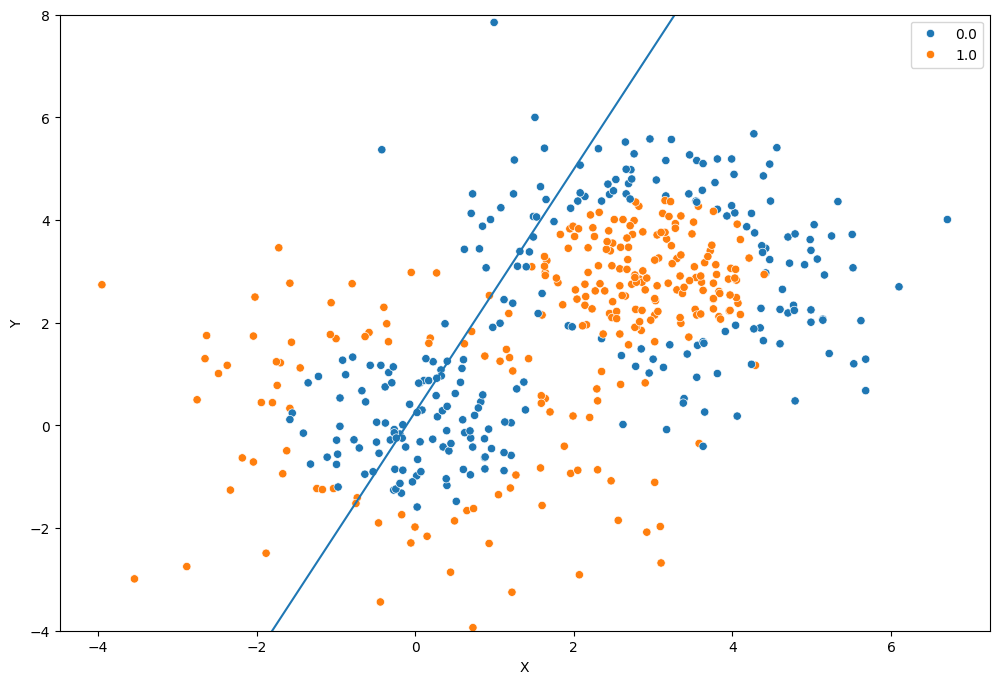

In [ ]:
fig = plt.figure()

sns.scatterplot(x=circ['X'], y=circ['Y'], hue=circ['class']);
sns.lineplot(x=circ['X'], y=y_region)

plt.ylim([-4, 8])

plt.show()

y = m*x + c  
c = -w1 / w2  
m = -w0 / w2

**Задание 2.** Разделите обучающую выборку и обучите 6 моделей kNN с различным числом соседей из `all_k`, сохраните обученные классификаторы в список. \
Выведите accuracy на тренировочной и тестовой выборке для каждой модели. Каково оптимальное число соседей с точки зрения accuracy?

In [ ]:
X = circ[['X', 'Y']].values
y = circ['class'].values.astype('int')

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    shuffle=True, random_state=2022)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
all_k = [1, 3, 10, 30, 40, 60]

### Your code is here
models = dict()
for k_neighbor in all_k:
  kn_model = KNeighborsClassifier(n_neighbors = k_neighbor)
  kn_model.fit(X_train, y_train)

  train_score = kn_model.score(X_train, y_train)
  test_score = kn_model.score(X_test, y_test)

  models[k_neighbor] = {
    'estimator': kn_model,
    'train_accuracy': train_score,
    'test_accuracy': test_score,

  }


In [ ]:
from pprint import pprint
pprint(models)

{1: {'estimator': KNeighborsClassifier(n_neighbors=1),
     'test_accuracy': 0.89,
     'train_accuracy': 1.0},
 3: {'estimator': KNeighborsClassifier(n_neighbors=3),
     'test_accuracy': 0.87,
     'train_accuracy': 0.9475},
 10: {'estimator': KNeighborsClassifier(n_neighbors=10),
      'test_accuracy': 0.85,
      'train_accuracy': 0.915},
 30: {'estimator': KNeighborsClassifier(n_neighbors=30),
      'test_accuracy': 0.74,
      'train_accuracy': 0.8525},
 40: {'estimator': KNeighborsClassifier(n_neighbors=40),
      'test_accuracy': 0.75,
      'train_accuracy': 0.8},
 60: {'estimator': KNeighborsClassifier(n_neighbors=60),
      'test_accuracy': 0.73,
      'train_accuracy': 0.6925}}


**Задание 3.** (бонусное) Скачайте библиотку [mlxtend](http://rasbt.github.io/mlxtend/#examples) для визуализации решающих поверхностей.
В документации можно ознакомиться с [примерами](http://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/) изображения решающих поверхностей для различных моделей. \
Построим несколько таких графиков для шести обученных нами kNN.

1. Подберите параметры `gridspec.GridSpec()` и `itertools.product()` для нашего числа классификаторов.
2. Удобно перед визулизацией сохранить обученные классификаторы в список `all_clfs`.
3. Проявите терпение! Отрисовка решающих поверхностей может занимать пару минут.

In [ ]:
import mlxtend
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools

In [ ]:
### Your code is here




1. Как меняется решающая поверхность с ростом числа соседей?
2. Какое оптимальное число соседей с точки зрения устройства данных и геометрии решающих поверхностей? Поясните свой ответ, опираясь на полученные графики.
3. Лучше ли справляется kNN по сравнению с логистической регрессией?

**Задание 4.** Скачайте уже известный вам датасет [SigmaCabs](https://www.kaggle.com/datasets/arashnic/taxi-pricing-with-mobility-analytics). Обучите классификатор kNN на отнормированных и не отнормированных данных, подобрав лучшие гиперпараметры среди $k \in [1, 5, 10]$. Замерьте качество на тестовой выборке. \
Почему нормирование данных помогает улучшить качество?

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/processed_sigma_cabs.csv')
df.head()

,Trip_Distance,Customer_Since_Months,Life_Style_Index,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Surge_Pricing_Type,Type_of_Cab_B,...,Destination_Type_F,Destination_Type_G,Destination_Type_H,Destination_Type_I,Destination_Type_J,Destination_Type_K,Destination_Type_L,Destination_Type_M,Destination_Type_N,Gender_Male
0,6.77,1.0,2.42769,3.90500,0,40.0,46,60,2,1,...,0,0,0,0,0,0,0,0,0,0
1,29.47,10.0,2.78245,3.45000,0,38.0,56,78,2,1,...,0,0,0,0,0,0,0,0,0,1
2,41.58,10.0,2.79805,3.50125,2,61.0,56,77,2,1,...,0,0,0,0,0,0,0,0,0,1
3,61.56,10.0,2.79805,3.45375,0,61.0,52,74,3,0,...,0,0,0,0,0,0,0,0,0,1
4,54.95,10.0,3.03453,3.40250,4,51.0,49,102,2,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
df = df.dropna()

X = df.drop('Surge_Pricing_Type', axis=1)
y = df['Surge_Pricing_Type']

# num_columns = X.describe().columns
# X = X[num_columns]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    shuffle=True, random_state=2022)

In [ ]:
### Your code is here
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

k_list = [1,5,10]

pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('kn', KNeighborsClassifier())
])

grid_params = {
    'kn__n_neighbors': k_list
}

grid_scale = GridSearchCV(pipe, grid_params)

grid_scale.fit(X_train, y_train)



KeyboardInterrupt: 

In [ ]:
pipe = Pipeline([
    ('kn', KNeighborsClassifier())
])

grid_non_scale = GridSearchCV(pipe, grid_params)

grid_non_scale.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('kn', KNeighborsClassifier())]),
             param_grid={'kn__n_neighbors': [1, 5, 10]})

In [ ]:
grid_scale.best_score_, grid_scale.best_params_

(np.float64(0.48606013414554744), {'kn__n_neighbors': 10})

In [ ]:
grid_non_scale.best_score_, grid_non_scale.best_params_

(np.float64(0.4605841040851981), {'kn__n_neighbors': 10})

In [ ]:
scale_est = grid_scale.best_estimator_
non_scale_est = grid_non_scale.best_estimator_

In [ ]:
scale_est.score(X_test, y_test)

0.49723624128815186

In [ ]:
non_scale_est.score(X_test, y_test)

0.4572218216774814

**Задание 5.** Обучите классификатор kNN на отнормированных данных с помощью метрики Минковского.
$$
\rho(x, z) = \bigg(\sum_i |x_i - z_i|^p\bigg) ^{1/p}
$$

Значение параметра `p` возьмите равным единице. Замерьте качество на тестовой выборке и сравните с предыдущим заданием, где `p = 2`.

In [ ]:
### Your code is here
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('kn', KNeighborsClassifier(n_neighbors=10,p=1, metric='minkowski'))
])

pipe.fit(X_train, y_train)


Pipeline(steps=[('scaler', StandardScaler()),
                ('kn', KNeighborsClassifier(n_neighbors=10, p=1))])

In [ ]:
pipe.score(X_test, y_test)

0.4894256188416246

**Задание 6.** Скачайте датасет [California Housing Prices](https://www.kaggle.com/datasets/camnugent/california-housing-prices), в котором мы будем предсказывать среднюю стоимость жилья. В качестве признаков будем использовать `['longitude', 'latitude']`, посмотрите на них с помощью scatterplot. \
По какой характеристике наш kNN регрессор в этом случае подбирает соседей?

1. Обучите обыкновенную линейную регрессию и замерьте RMSE на тренировочной и тестовой выборках.
2. Обучите kNN регрессор на отнормированных данных, подобрав лучшие гиперпараметры $k \in [1, 2, ..., 9]$.
3. Обучите kNN регрессор с гауссовским ядром, взяв параметр k из предыдущего пункта и подобрав оптимальное значение ширины окна среди предложенных $h \in np.arange(0.02, 0.1, 0.01)$.

Как ширина окна влияет на веса при усреднении ответа по соседям?

In [6]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


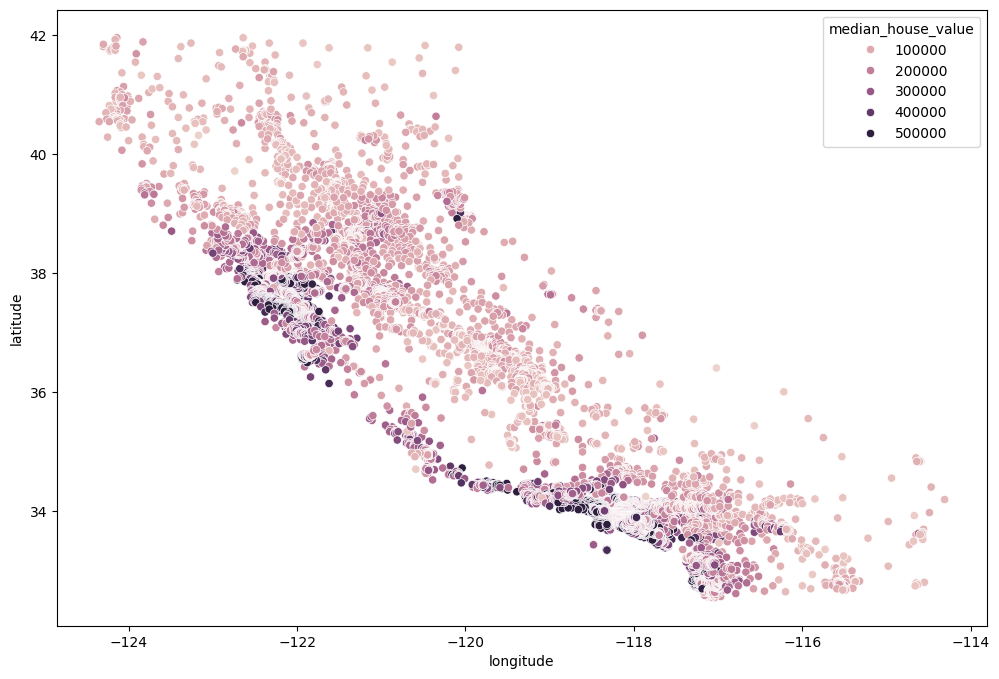

In [8]:
X = df[['longitude', 'latitude']]
y = df['median_house_value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    shuffle=True, random_state=2022)
sns.scatterplot(x=X['longitude'], y=X['latitude'], data=X, hue=y);

In [9]:
### Your code is here
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

pipe_lr = Pipeline([
    ('scaler', StandardScaler()),
    ('lr', LinearRegression())
])

pipe_lr.fit(X_train, y_train)
print(pipe_lr.score(X_test, y_test))

0.25224364231806407


In [10]:
from sklearn.neighbors import KNeighborsRegressor
pipe_kn = Pipeline([
    ('scaler', StandardScaler()),
    ('kn', KNeighborsRegressor())
])
grid_params = {'kn__n_neighbors': range(1,10)}

grid_kn = GridSearchCV(pipe_kn, grid_params)
grid_kn.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('kn', KNeighborsRegressor())]),
             param_grid={'kn__n_neighbors': range(1, 10)})

In [12]:
grid_kn.best_params_

{'kn__n_neighbors': 6}

In [13]:
grid_kn.best_estimator_.score(X_test, y_test)

0.7854059580292986

In [23]:
def kernel(distances, h=1):
        const = 1 / (np.sqrt(2 * np.pi))
        power = (-1/2) * ((distances)**2) / h**2

        return const * np.exp(power)

In [55]:
def kern_fab(h):

  def krn(dist):
    """wtf"""
    return kernel(dist, h)

  krn.__repr__ = f"krn_h_{h:.3f}"
  krn.__str__ = f"krn_h_{h:.3f}"
  krn.__name__ = f"krn_h_{h:.3f}"
  krn.h=h

  return krn

In [21]:
np.arange(0.02,0.1,0.01)

array([0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09])

In [50]:
a = kern_fab(99)

In [54]:
str(a.__name__)

'krn_h_99.000'

In [44]:
[kern_fab(h) for h in np.arange(0.02,0.1,0.01)]

[<function __main__.kern_fab.<locals>.krn(dist)>,
 <function __main__.kern_fab.<locals>.krn(dist)>,
 <function __main__.kern_fab.<locals>.krn(dist)>,
 <function __main__.kern_fab.<locals>.krn(dist)>,
 <function __main__.kern_fab.<locals>.krn(dist)>,
 <function __main__.kern_fab.<locals>.krn(dist)>,
 <function __main__.kern_fab.<locals>.krn(dist)>,
 <function __main__.kern_fab.<locals>.krn(dist)>]

In [66]:
from sklearn.metrics import root_mean_squared_error

pipe_gaus = Pipeline([
    ('scaler', StandardScaler()),
    ('kn', KNeighborsRegressor(n_neighbors=6))
])

grid_params = {'kn__weights': [kern_fab(h) for h in np.arange(0.02,0.1,0.01)]}

grid_gaus = GridSearchCV(pipe_gaus, grid_params, scoring='neg_root_mean_squared_error')

grid_gaus.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('kn',
                                        KNeighborsRegressor(n_neighbors=6))]),
             param_grid={'kn__weights': [<function kern_fab.<locals>.krn at 0x7fda7fab3ba0>,
                                         <function kern_fab.<locals>.krn at 0x7fda7fab3ce0>,
                                         <function kern_fab.<locals>.krn at 0x7fda7fab0ae0>,
                                         <function kern_fab.<locals>.krn at 0x7fda7fab2e80>,
                                         <function kern_fab.<locals>.krn at 0x7fda7fab3420>,
                                         <function kern_fab.<locals>.krn at 0x7fda7fab0b80>,
                                         <function kern_fab.<locals>.krn at 0x7fda7fab2d40>,
                                         <function kern_fab.<locals>.krn at 0x7fda7fab2f20>]},
             scoring='neg_root_mean_squared_error')

In [67]:
grid_gaus.cv_results_

{'mean_fit_time': array([0.01758499, 0.01471124, 0.01473117, 0.01779399, 0.01579924,
        0.01442122, 0.01450801, 0.01685662]),
 'std_fit_time': array([0.00300784, 0.00054568, 0.00160275, 0.00457648, 0.0014203 ,
        0.00023517, 0.00043705, 0.00406778]),
 'mean_score_time': array([0.02363744, 0.02248397, 0.03021798, 0.02089448, 0.02169714,
        0.02091107, 0.02112765, 0.02721391]),
 'std_score_time': array([0.00268637, 0.00154589, 0.00885186, 0.0003264 , 0.00076996,
        0.00041235, 0.00031619, 0.01083763]),
 'param_kn__weights': masked_array(data=[<function kern_fab.<locals>.krn at 0x7fda7fab3ba0>,
                    <function kern_fab.<locals>.krn at 0x7fda7fab3ce0>,
                    <function kern_fab.<locals>.krn at 0x7fda7fab0ae0>,
                    <function kern_fab.<locals>.krn at 0x7fda7fab2e80>,
                    <function kern_fab.<locals>.krn at 0x7fda7fab3420>,
                    <function kern_fab.<locals>.krn at 0x7fda7fab0b80>,
                    <

In [68]:
grid_gaus.cv_results_['mean_test_score']

array([-53473.23639891, -53594.03583599, -53672.06707725, -53711.59296479,
       -53733.65177431, -53748.81841791, -53760.37967577, -53769.52869737])

In [69]:
# кастомный scorer
from sklearn.metrics import mean_squared_error, make_scorer

pipe_gaus = Pipeline([
    ('scaler', StandardScaler()),
    ('kn', KNeighborsRegressor(n_neighbors=6))
])

# Кастомная метрика RMSE (из MSE берём квадратный корень)
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# Создаём scorer для GridSearchCV
rmse_scorer = make_scorer(rmse, greater_is_better=False)


grid_params = {'kn__weights': [kern_fab(h) for h in np.arange(0.02,0.1,0.01)]}

grid_gaus = GridSearchCV(pipe_gaus, grid_params, scoring=rmse_scorer)

grid_gaus.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('kn',
                                        KNeighborsRegressor(n_neighbors=6))]),
             param_grid={'kn__weights': [<function kern_fab.<locals>.krn at 0x7fda7fab0360>,
                                         <function kern_fab.<locals>.krn at 0x7fda7fab00e0>,
                                         <function kern_fab.<locals>.krn at 0x7fda7fab14e0>,
                                         <function kern_fab.<locals>.krn at 0x7fda7fab0400>,
                                         <function kern_fab.<locals>.krn at 0x7fda7fab2a20>,
                                         <function kern_fab.<locals>.krn at 0x7fda7fab0d60>,
                                         <function kern_fab.<locals>.krn at 0x7fda7fab2de0>,
                                         <function kern_fab.<locals>.krn at 0x7fda7fab0fe0>]},
             scoring=make_scorer(rmse, greater_is_better=False, response_method='predict'))

In [70]:
grid_gaus.cv_results_['mean_test_score']

array([-53473.23639891, -53594.03583599, -53672.06707725, -53711.59296479,
       -53733.65177431, -53748.81841791, -53760.37967577, -53769.52869737])

In [71]:
grid_gaus.cv_results_

{'mean_fit_time': array([0.01093802, 0.01707454, 0.01722698, 0.01819057, 0.01890593,
        0.01556935, 0.01631551, 0.01595435]),
 'std_fit_time': array([0.00104425, 0.00176463, 0.00303355, 0.00523233, 0.0070574 ,
        0.0008931 , 0.00302262, 0.00189846]),
 'mean_score_time': array([0.01718745, 0.02507615, 0.02369108, 0.02713137, 0.0254477 ,
        0.02494702, 0.02280836, 0.02186685]),
 'std_score_time': array([0.00496158, 0.00483015, 0.00181178, 0.00607748, 0.00283549,
        0.00669044, 0.00233942, 0.00156591]),
 'param_kn__weights': masked_array(data=[<function kern_fab.<locals>.krn at 0x7fda7fab0360>,
                    <function kern_fab.<locals>.krn at 0x7fda7fab00e0>,
                    <function kern_fab.<locals>.krn at 0x7fda7fab14e0>,
                    <function kern_fab.<locals>.krn at 0x7fda7fab0400>,
                    <function kern_fab.<locals>.krn at 0x7fda7fab2a20>,
                    <function kern_fab.<locals>.krn at 0x7fda7fab0d60>,
                    <

In [72]:
grid_gaus.best_params_

{'kn__weights': <function __main__.kern_fab.<locals>.krn(dist)>}